In [59]:
# importing nessecary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


In [60]:

# loading the dataset\
data = pd.read_csv('C:\\Users\\asus\\Desktop\\github\\task\\disney_plus_titles.csv')


In [61]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [62]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [63]:
data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [65]:
import missingno as msno

<Axes: >

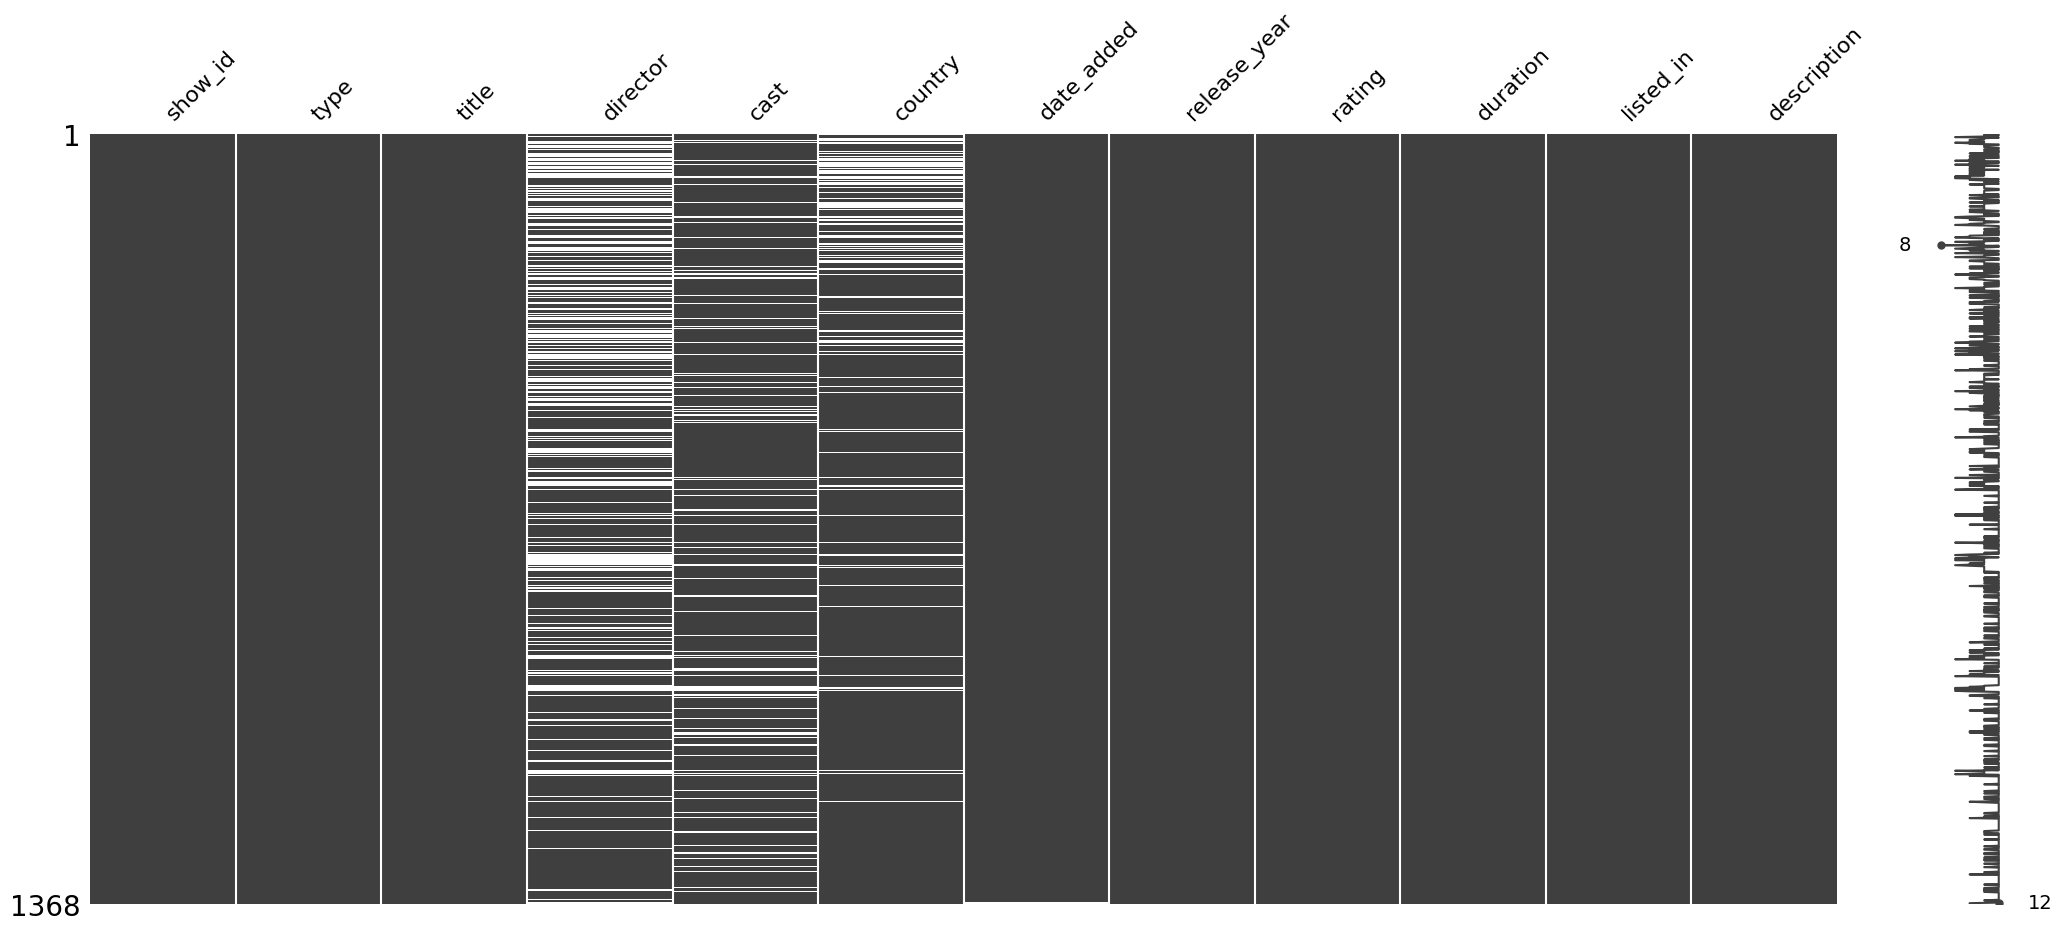

In [66]:
msno.matrix(data)

In [67]:
data.drop_duplicates(inplace=True)

In [68]:
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [69]:
data.drop(['director','cast','country','description'],axis=1,inplace=True)

In [70]:
data['rating'].fillna(data['rating'].mode)
data.dropna(inplace=True)
data['date_added']=pd.to_datetime(data['date_added'])

In [71]:
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day
data['added_year']=data['date_added'].dt.year

In [72]:
data

,show_id,type,title,date_added,release_year,rating,duration,listed_in,month,day,added_year
0,s1,Movie,A Spark Story,2021-09-24,2021,TV-PG,88 min,Documentary,9,24,2021
1,s2,Movie,Spooky Buddies,2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",9,24,2021
2,s3,Movie,The Fault in Our Stars,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",9,24,2021
3,s4,TV Show,Dog: Impossible,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",9,22,2021
4,s5,TV Show,Spidey And His Amazing Friends,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",9,22,2021
...,...,...,...,...,...,...,...,...,...,...,...
1360,s1361,TV Show,Smart Guy,2019-10-01,1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",10,1,2019
1361,s1362,Movie,The Cat from Outer Space,2019-10-01,1978,G,104 min,"Comedy, Family, Science Fiction",10,1,2019
1362,s1363,Movie,The Great Mouse Detective,2019-10-01,1986,G,75 min,"Animation, Family, Mystery",10,1,2019
1363,s1364,Movie,The Sword in the Stone,2019-10-01,1963,G,80 min,"Action-Adventure, Animation, Comedy",10,1,2019


In [73]:

# Questions
questions =["1) What are different types of genre and which is highly watched?",
    "2) How does the number of titles added vary by month?",
    "3) What is the distribution of ratings?",
    "4) Which year has the highest movies/TV Shows realesed?",
    "5) What is the relationship between the date a title was added and its release year?",
    "6) How does the number of movies added each year vary by release year?"]

questions

['1) What are different types of genre and which is highly watched?',
 '2) How does the number of titles added vary by month?',
 '3) What is the distribution of ratings?',
 '4) Which year has the highest movies/TV Shows realesed?',
 '5) What is the relationship between the date a title was added and its release year?',
 '6) How does the number of movies added each year vary by release year?']

1st Question

In [74]:
#Let's find the answer of our 1st question.
#1)What are different types of genre and which is highly watched? 
data['type'].value_counts()

type
Movie      990
TV Show    373
Name: count, dtype: int64

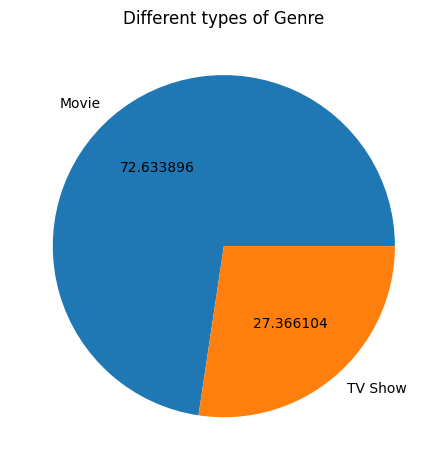

In [75]:
plt.pie(data['type'].value_counts(),labels=['Movie','TV Show'],autopct='%2f')
plt.title('Different types of Genre')
plt.tight_layout()

2nd Question

In [76]:
#Let's find the answer of our 2nd question.
#2)How does the number of titles added vary by month?

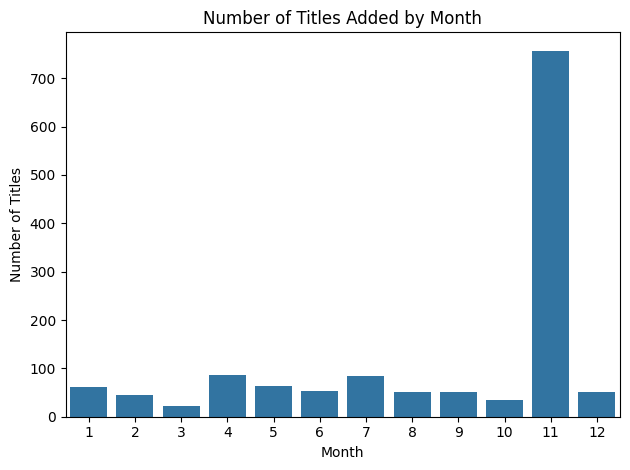

In [77]:
sns.countplot(x='month', data=data)
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.tight_layout()

In [78]:
data['month'].value_counts(ascending=True)

month
3      22
10     34
2      44
9      52
12     52
8      52
6      54
1      61
5      64
7      85
4      86
11    757
Name: count, dtype: int64

3rd Question

In [79]:
#Let's find the answer of our 3rd question.
#3)What is the distribution of ratings?

Text(0, 0.5, 'Rating')

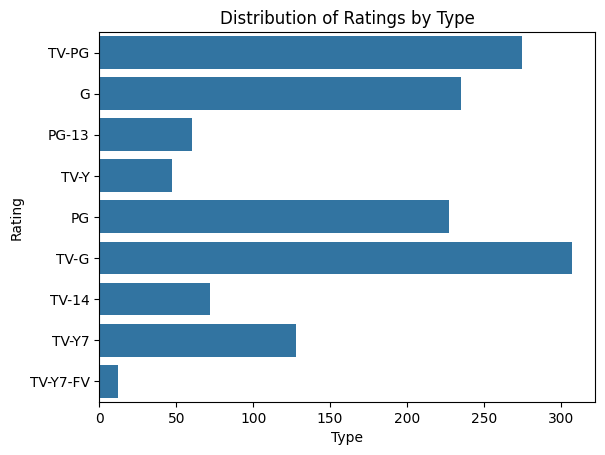

In [80]:
sns.countplot(y='rating', data=data)
plt.title('Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')

In [81]:
data['rating'].value_counts(ascending=True)

rating
TV-Y7-FV     12
TV-Y         47
PG-13        60
TV-14        72
TV-Y7       128
PG          227
G           235
TV-PG       275
TV-G        307
Name: count, dtype: int64

4th Question

In [82]:
#Let's find the answer of our 4th question.
#4)Which year has the highest movies/TV Shows realesed?

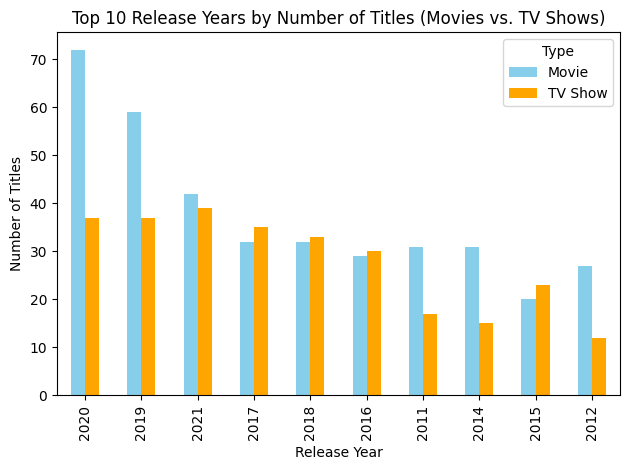

In [83]:
type_year_df = data.groupby(['release_year', 'type']).size().unstack().fillna(0)
type_year_df['Total'] = type_year_df.sum(axis=1)
top_10_years = type_year_df.sort_values('Total', ascending=False).head(10).drop(columns=['Total'])
top_10_years.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Top 10 Release Years by Number of Titles (Movies vs. TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()


5th Question

In [84]:
#Let's find the answer of our 5th question.
#5)What is the relationship between the date a title was added and its release year?

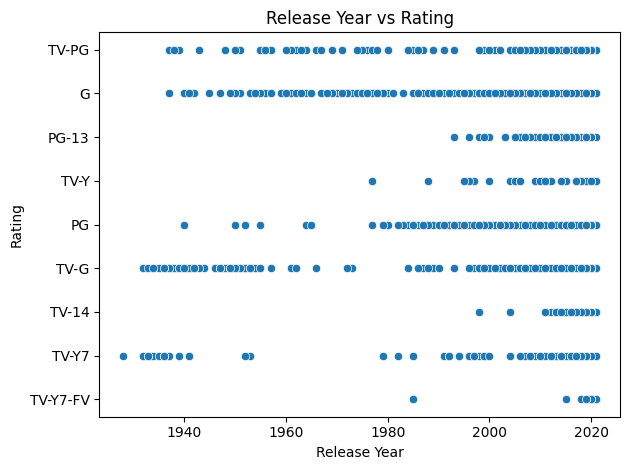

In [85]:
sns.scatterplot(x='release_year', y='rating', data=data)
plt.title('Release Year vs Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.tight_layout()

6th Question

In [86]:
#Let's find the answer of our 6th question.
#6)How does the number of movies added each year vary by release year?

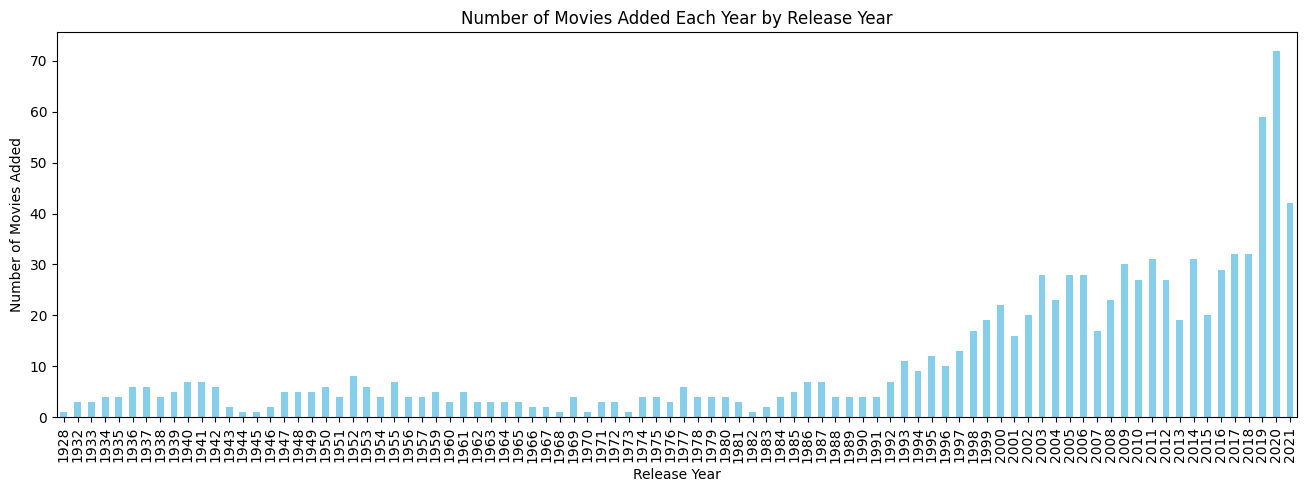

In [87]:
movies_df = data[data['type'] == 'Movie']
movies_per_year = movies_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(16,5))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Added Each Year by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Added')
plt.xticks(rotation=90);